<a href="https://colab.research.google.com/github/InwARMSelviAXE/BasicProg_DataViz65/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

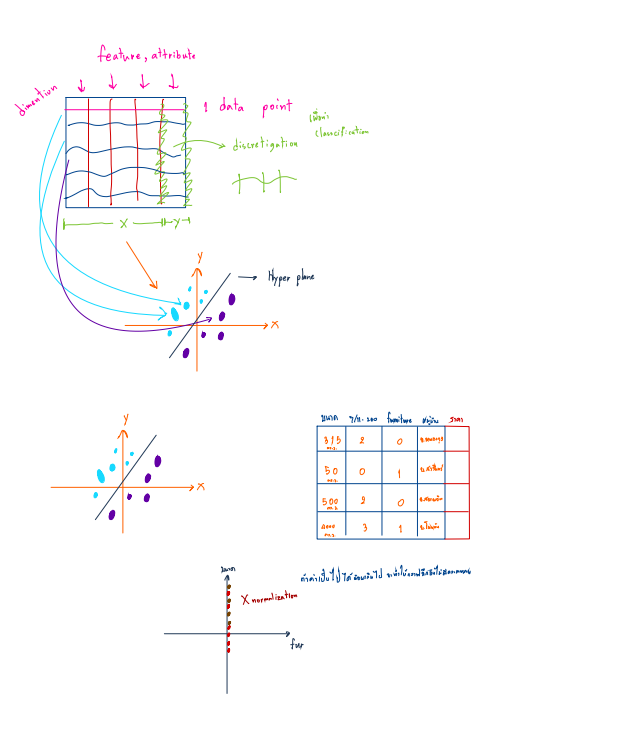
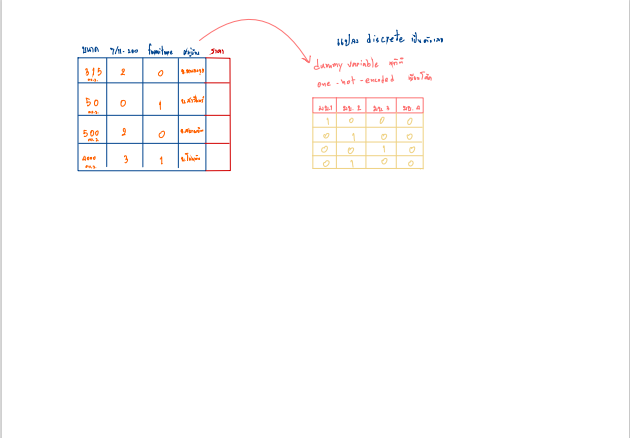

# Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ใช้ data กรมอุตุ

In [3]:
weather_data = pd.read_csv('/content/drive/MyDrive/Data Mining/Quiz ก่อน Mid/Group3_ณัฐธิดา_ศุภัสรา_เฉลิมเกียรติ_พิทวัส.csv')

In [8]:
weather_data.shape

(8169, 13)

In [9]:
weather_data.head(10)

,จังหวัด,วันที่,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,22.8,25.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,23.1,24.3,2011-10-05
5,ขอนแก่น,6,10,2011,1011.36,86,3,10,0.5,21.3,21.7,24.0,2011-10-06
6,ขอนแก่น,7,10,2011,1011.17,83,4,10,1.3,21.9,22.0,25.1,2011-10-07
7,ขอนแก่น,8,10,2011,1010.20,82,3,7,0.2,23.3,23.2,27.0,2011-10-08
8,ขอนแก่น,9,10,2011,1010.14,82,4,8,4.6,23.4,24.1,27.1,2011-10-09
9,ขอนแก่น,10,10,2011,1010.60,77,3,4,0,22.7,23.2,27.5,2011-10-10


In [14]:
data_features = weather_data.iloc[:,4:-1]
data_features.head(10)

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,1007.49,86,3,10,3,22.9,22.1,25.6
3,1008.28,80,2,8,0,21.9,22.8,25.8
4,1009.88,86,2,10,2.2,21.7,23.1,24.3
5,1011.36,86,3,10,0.5,21.3,21.7,24.0
6,1011.17,83,4,10,1.3,21.9,22.0,25.1
7,1010.20,82,3,7,0.2,23.3,23.2,27.0
8,1010.14,82,4,8,4.6,23.4,24.1,27.1
9,1010.60,77,3,4,0,22.7,23.2,27.5


In [15]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.111413,69.798262,18.151916,24.868405
std,3.242448,8.870501,3.775475,2.846185
min,1002.070000,38.000000,1.500000,11.800000
25%,1011.040000,64.000000,15.800000,23.300000
50%,1012.890000,69.000000,18.400000,25.300000
75%,1015.120000,75.000000,21.000000,27.000000
max,1025.710000,99.000000,28.400000,31.000000


In [16]:
data_features.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
อุณหภูมิตุ้มแห้ง      float64
dtype: object

In [44]:
weather_data1 = weather_data[weather_data.eq('-').any(1) == False] # ลบเฉพาะค่าที่เราต้องการ
weather_data1

,จังหวัด,วันที่,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,22.8,25.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,23.1,24.3,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,หนองคาย,24,2,2022,1020.63,66,2,1,0,13.2,14.0,20.3,2022-02-24
8165,หนองคาย,25,2,2022,1019.32,68,2,1,0,14.3,13.9,20.7,2022-02-25
8166,หนองคาย,26,2,2022,1017.28,65,1,0,0,15.2,15.0,22.7,2022-02-26
8167,หนองคาย,27,2,2022,1016.43,62,2,3,0,15.8,17.5,23.8,2022-02-27


In [45]:
weather_data[weather_data['ความเร็วลม'].eq('-')] # .eq() เช็ตหรือเรียกค่าที่ต้องการ

,จังหวัด,วันที่,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
1079,ขอนแก่น,21,10,2018,1012.65,87,-,-,53.3,23.5,24.5,25.8,2018-10-21
1122,ขอนแก่น,3,12,2018,1011.47,61,-,-,-,19.7,22.7,28.5,2018-12-03
1773,นครพนม,18,1,2012,1008.50,73,-,4,0,20.2,20,25.6,2012-01-18
1776,นครพนม,21,1,2012,1009.51,89,-,7,1.2,22.0,21.1,24.2,2012-01-21
1856,นครพนม,10,11,2012,1009.45,73,-,4,0,23.9,24.9,29.7,2012-11-10
1862,นครพนม,16,11,2012,1011.50,70,-,6,0,21.0,22.2,27.5,2012-11-16
1927,นครพนม,20,1,2013,1015.58,65,-,2,0,15.0,15.3,22.7,2013-01-20
1995,นครพนม,29,10,2013,1014.22,67,-,1,-,19.4,20.6,26.5,2013-10-29
2063,นครพนม,5,1,2014,1013.33,68,-,-,-,14.0,-,21.0,2014-01-05
2125,นครพนม,8,10,2014,1011.17,72,-,8,0,21.3,23.0,27.1,2014-10-08


In [46]:
weather_data1[weather_data1.eq('T').any(1)]

,จังหวัด,วันที่,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
24,ขอนแก่น,25,10,2011,1011.34,73,5,5,T,21.8,22.7,27.4,2011-10-25
102,ขอนแก่น,11,1,2012,1016.16,59,6,7,T,14.2,19.0,22.9,2012-01-11
121,ขอนแก่น,30,1,2012,1012.34,67,4,10,T,18.7,21.6,25.3,2012-01-30
125,ขอนแก่น,3,2,2012,1013.61,71,3,8,T,19.5,20.9,25.3,2012-02-03
155,ขอนแก่น,4,10,2012,1007.07,81,2,7,T,24.1,24.2,27.9,2012-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,สกลนคร,26,12,2021,1016.34,74,2,5,T,18.7,19.8,23.9,2021-12-26
6521,หนองคาย,17,10,2011,1013.41,77,3,10,T,19.3,22.0,23.6,2011-10-17
7874,หนองคาย,8,10,2020,1008.32,78,2,4,T,21.6,24.3,26.0,2020-10-08
7891,หนองคาย,25,10,2020,1011.52,68,2,3,T,19.4,20.0,26.1,2020-10-25


In [52]:
weather_data1[weather_data1.eq('T').any(1) == False]

,จังหวัด,วันที่,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,22.8,25.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,23.1,24.3,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,หนองคาย,24,2,2022,1020.63,66,2,1,0,13.2,14.0,20.3,2022-02-24
8165,หนองคาย,25,2,2022,1019.32,68,2,1,0,14.3,13.9,20.7,2022-02-25
8166,หนองคาย,26,2,2022,1017.28,65,1,0,0,15.2,15.0,22.7,2022-02-26
8167,หนองคาย,27,2,2022,1016.43,62,2,3,0,15.8,17.5,23.8,2022-02-27


In [54]:
data_features1 = data_features[data_features.eq('-').any(1) == False] # ลบเฉพาะค่าที่เราต้องการ
data_features1

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,1007.49,86,3,10,3,22.9,22.1,25.6
3,1008.28,80,2,8,0,21.9,22.8,25.8
4,1009.88,86,2,10,2.2,21.7,23.1,24.3
...,...,...,...,...,...,...,...,...
8164,1020.63,66,2,1,0,13.2,14.0,20.3
8165,1019.32,68,2,1,0,14.3,13.9,20.7
8166,1017.28,65,1,0,0,15.2,15.0,22.7
8167,1016.43,62,2,3,0,15.8,17.5,23.8


In [62]:
data_features2 = data_features1[data_features1.eq('T').any(1) == False]

In [63]:
data_features2

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3.0,9.0,1.4,24.2,24.8,27.6
1,1006.65,92,2.0,10.0,17.7,24.0,23.0,25.6
2,1007.49,86,3.0,10.0,3,22.9,22.1,25.6
3,1008.28,80,2.0,8.0,0,21.9,22.8,25.8
4,1009.88,86,2.0,10.0,2.2,21.7,23.1,24.3
...,...,...,...,...,...,...,...,...
8164,1020.63,66,2.0,1.0,0,13.2,14.0,20.3
8165,1019.32,68,2.0,1.0,0,14.3,13.9,20.7
8166,1017.28,65,1.0,0.0,0,15.2,15.0,22.7
8167,1016.43,62,2.0,3.0,0,15.8,17.5,23.8


## เปลี่ยนให้เป็นตัวเลข

In [64]:
data_features2['ความเร็วลม'] = data_features2['ความเร็วลม'].astype(float)
data_features2['จำนวนเมฆ'] = data_features2['จำนวนเมฆ'].astype(float)
data_features2['ปริมาณฝน'] = data_features2['ปริมาณฝน'].astype(float)
data_features2['อุณหภูมิต่ำสุด'] = data_features2['อุณหภูมิต่ำสุด'].astype(float)

<ipython-input-64-44047dae9c4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features2['ความเร็วลม'] = data_features2['ความเร็วลม'].astype(float)
<ipython-input-64-44047dae9c4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features2['จำนวนเมฆ'] = data_features2['จำนวนเมฆ'].astype(float)
<ipython-input-64-44047dae9c4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [66]:
data_features2.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.818317,70.438253,2.284726,3.308832,1.556194,18.420944,19.933570,25.002667
std,3.173917,9.433792,1.209540,2.494353,6.816712,3.630472,3.295887,2.720534
min,1002.070000,38.000000,0.000000,0.000000,0.000000,1.500000,6.800000,11.800000
25%,1010.820000,64.000000,1.000000,1.000000,0.000000,16.100000,17.900000,23.500000
50%,1012.670000,69.000000,2.000000,3.000000,0.000000,18.500000,20.300000,25.400000
75%,1014.800000,77.000000,3.000000,5.000000,0.000000,21.200000,22.500000,26.900000
max,1025.710000,99.000000,10.000000,10.000000,112.400000,28.400000,26.700000,31.000000


In [67]:
import matplotlib

In [70]:
matplotlib.rcParams['figure.figsize']=[15,15]

In [74]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!ls

drive  sample_data  thsarabunnew-webfont.ttf


In [75]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

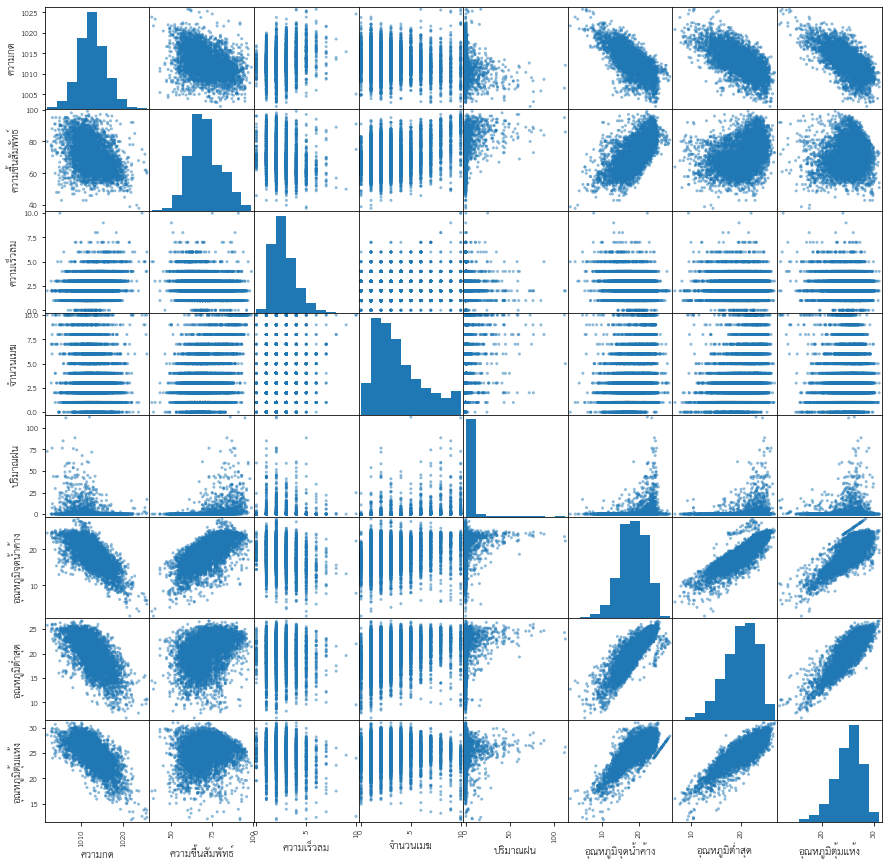

In [76]:
pd.plotting.scatter_matrix(data_features2);

In [88]:
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize']=[10,10]

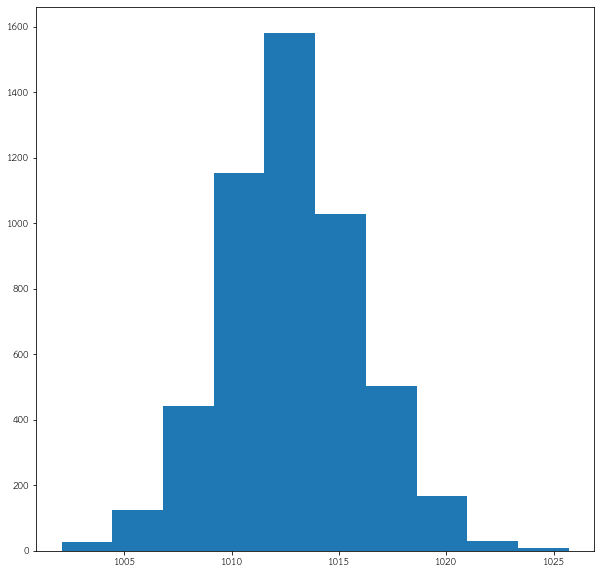

In [89]:
plt.hist(data_features2['ความกด']);

In [78]:
from sklearn import preprocessing

### Standard Scaler

In [83]:
# define
scaler = preprocessing.StandardScaler()
# train
scaler.fit(data_features2)
#predict-transform
data_features3 = scaler.transform(data_features2)

In [84]:
data_features3

array([[-2.31544908,  1.33170074,  0.5914187 , ...,  1.59197655,
         1.47666181,  0.95480871],
       [-1.94363196,  2.28581221, -0.23542385, ...,  1.53688186,
         0.93047261,  0.21958617],
       [-1.67894858,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.65737801,  0.21958617],
       ...,
       [ 1.40587314, -0.57652221, -1.06226641, ..., -0.88728479,
        -1.49703494, -0.8464865 ],
       [ 1.13803877, -0.89455937, -0.23542385, ..., -0.7220007 ,
        -0.73843883, -0.44211411],
       [ 0.22425093, -0.57652221, -0.23542385, ..., -0.17105374,
        -0.28328116,  0.14606392]])

(array([  26.,  124.,  441., 1153., 1580., 1028.,  503.,  167.,   30.,
           9.]),
 array([-3.38678655, -2.64189191, -1.89699727, -1.15210262, -0.40720798,
         0.33768666,  1.0825813 ,  1.82747595,  2.57237059,  3.31726523,
         4.06215987]),
 <a list of 10 Patch objects>)

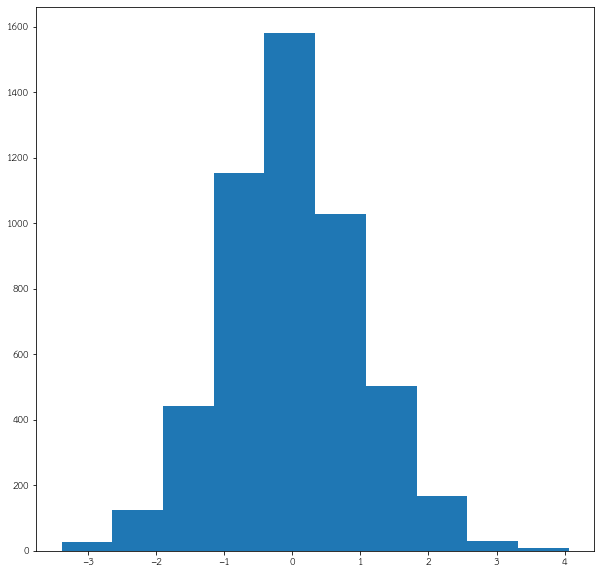

In [90]:
plt.hist(data_features3[:,0])

In [116]:
matplotlib.rcParams['figure.figsize']=[13,9]

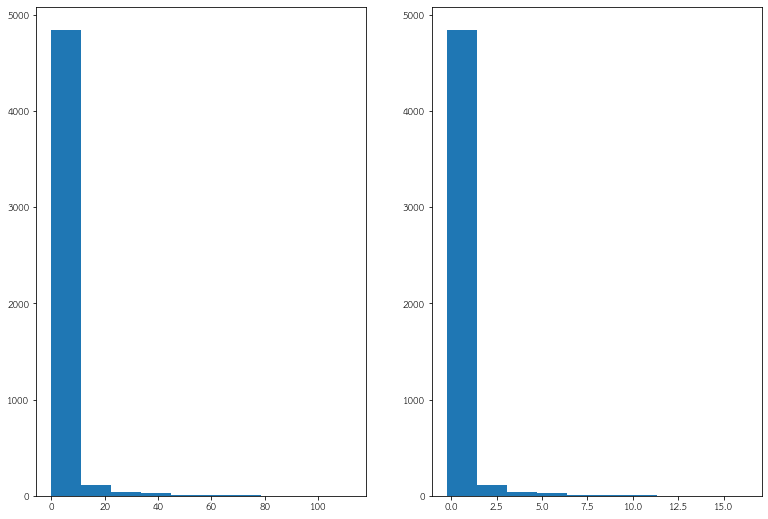

In [117]:
plt.subplot(1,2,1)
plt.hist(data_features2['ปริมาณฝน']);
plt.subplot(1,2,2)
plt.hist(data_features3[:,4]);

# Min-Max normalization

In [118]:
# define
scaler = preprocessing.MinMaxScaler()
# train
scaler.fit(data_features2)
#predict-transform
data_features4 = scaler.transform(data_features2)

In [124]:
matplotlib.rcParams['figure.figsize']=[20,10]

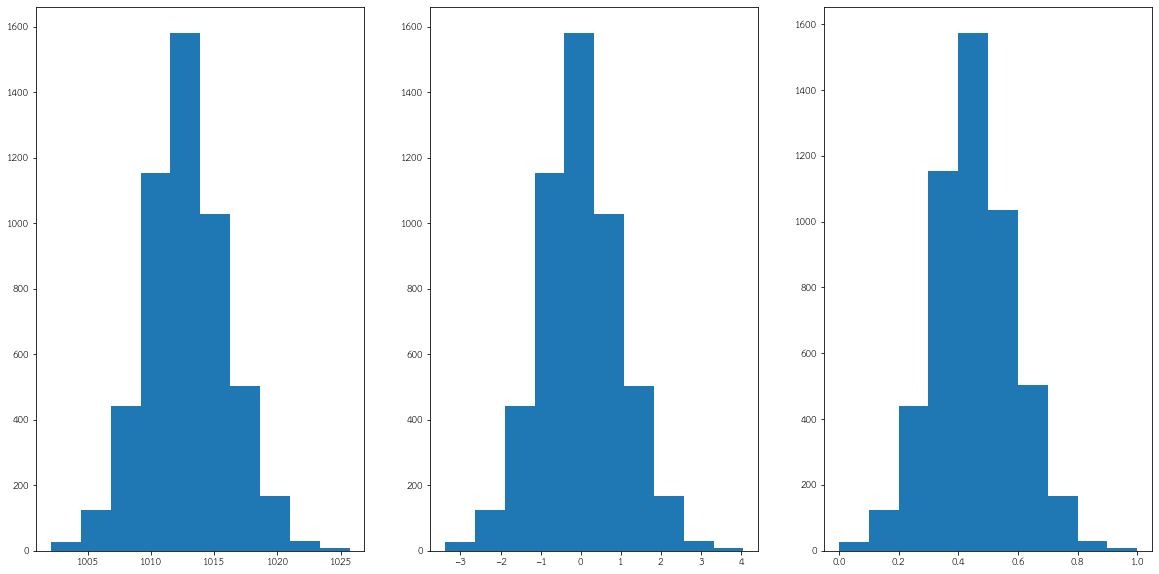

In [125]:
plt.subplot(1,3,1)
plt.hist(data_features2['ความกด']);
plt.subplot(1,3,2)
plt.hist(data_features3[:,0]);
plt.subplot(1,3,3)
plt.hist(data_features4[:,0]);

# Discritization

In [126]:
home_data = pd.read_csv('/content/drive/MyDrive/Data Mining/Quiz ก่อน Mid/เฉลิมเกียรติ คำชะนาม.csv')

In [128]:
home_data.head(10)

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
5,568.0,NaN,1.0,25.7,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,5720000.0,0,0,0,0,2,3
6,597.0,NaN,2.0,88.4,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,NaN,เหล่านาดี,5712000.0,0,1,1,1,1,1
7,624.0,NaN,NaN,98.9,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,รอบบึง,5280000.0,0,0,0,0,2,4
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,1,2,4,8


In [129]:
home_data.isnull().any()

post_id               False
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom     False
number_of_bathroom     True
direction             False
furniture             False
usable_area           False
number_of_parking     False
project_name           True
district              False
zone                   True
street                 True
sell_price            False
d250-7/11             False
d500-7/11             False
d750-7/11             False
d1000-7/11            False
d1250-7/11            False
d1500-7/11            False
dtype: bool

In [132]:
home_data = home_data.dropna(subset = ['sell_price']) # Drop เฉพาะคอลัมป์ที่เลือก ใช้ subset

In [140]:
matplotlib.rcParams['figure.figsize']=[10,8]

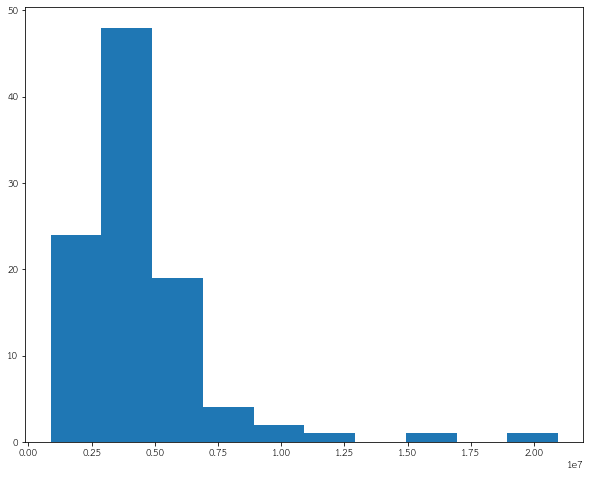

In [141]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price
- ราคาต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m - 10m ให้เป็น 2
- ราคา 10m ขึ้นไป ให้เป็น 3

# One-hot-encoder

In [158]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [159]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
